In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download plameneduardo/sarscov2-ctscan-dataset

sarscov2-ctscan-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sarscov2-ctscan-dataset.zip

Archive:  sarscov2-ctscan-dataset.zip
replace COVID/Covid (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

In [ ]:
!pwd

/content


In [ ]:
folder_name=['COVID', 'non-COVID']
all_folders=os.listdir()
data=[]
i=0
for folder in folder_name:
  files = os.listdir('/content/'+folder)
  print(files)
  for _file in files:
    data.append([_file,i,folder])
    i+=1

['Covid (675).png', 'Covid (366).png', 'Covid (368).png', 'Covid (557).png', 'Covid (582).png', 'Covid (889).png', 'Covid (26).png', 'Covid (913).png', 'Covid (726).png', 'Covid (786).png', 'Covid (220).png', 'Covid (874).png', 'Covid (1013).png', 'Covid (146).png', 'Covid (617).png', 'Covid (972).png', 'Covid (835).png', 'Covid (596).png', 'Covid (699).png', 'Covid (496).png', 'Covid (765).png', 'Covid (1005).png', 'Covid (500).png', 'Covid (1033).png', 'Covid (629).png', 'Covid (393).png', 'Covid (233).png', 'Covid (1232).png', 'Covid (349).png', 'Covid (884).png', 'Covid (226).png', 'Covid (540).png', 'Covid (9).png', 'Covid (908).png', 'Covid (14).png', 'Covid (571).png', 'Covid (810).png', 'Covid (1054).png', 'Covid (939).png', 'Covid (1044).png', 'Covid (294).png', 'Covid (335).png', 'Covid (606).png', 'Covid (516).png', 'Covid (816).png', 'Covid (1113).png', 'Covid (877).png', 'Covid (824).png', 'Covid (78).png', 'Covid (1141).png', 'Covid (798).png', 'Covid (1101).png', 'Covid 

In [ ]:
data

[['Covid (675).png', 0, 'COVID'],
 ['Covid (366).png', 1, 'COVID'],
 ['Covid (368).png', 2, 'COVID'],
 ['Covid (557).png', 3, 'COVID'],
 ['Covid (582).png', 4, 'COVID'],
 ['Covid (889).png', 5, 'COVID'],
 ['Covid (26).png', 6, 'COVID'],
 ['Covid (913).png', 7, 'COVID'],
 ['Covid (726).png', 8, 'COVID'],
 ['Covid (786).png', 9, 'COVID'],
 ['Covid (220).png', 10, 'COVID'],
 ['Covid (874).png', 11, 'COVID'],
 ['Covid (1013).png', 12, 'COVID'],
 ['Covid (146).png', 13, 'COVID'],
 ['Covid (617).png', 14, 'COVID'],
 ['Covid (972).png', 15, 'COVID'],
 ['Covid (835).png', 16, 'COVID'],
 ['Covid (596).png', 17, 'COVID'],
 ['Covid (699).png', 18, 'COVID'],
 ['Covid (496).png', 19, 'COVID'],
 ['Covid (765).png', 20, 'COVID'],
 ['Covid (1005).png', 21, 'COVID'],
 ['Covid (500).png', 22, 'COVID'],
 ['Covid (1033).png', 23, 'COVID'],
 ['Covid (629).png', 24, 'COVID'],
 ['Covid (393).png', 25, 'COVID'],
 ['Covid (233).png', 26, 'COVID'],
 ['Covid (1232).png', 27, 'COVID'],
 ['Covid (349).png', 28, 'C

In [ ]:
type(data)

list

In [ ]:
data_df=pd.DataFrame(data, columns = ['filename','ID','disease_type'])
data_df

,filename,ID,disease_type
0,Covid (675).png,0,COVID
1,Covid (366).png,1,COVID
2,Covid (368).png,2,COVID
3,Covid (557).png,3,COVID
4,Covid (582).png,4,COVID
...,...,...,...
2476,Non-Covid (750).png,2476,non-COVID
2477,Non-Covid (557).png,2477,non-COVID
2478,Non-Covid (614).png,2478,non-COVID
2479,Non-Covid (393).png,2479,non-COVID


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
len(data_df)

2481

In [ ]:
data_df.iloc[2480,0]

'Non-Covid (896).png'

In [ ]:
data_df.iloc[2480,1]

2480

In [ ]:
data_df.iloc[2480,2]

'non-COVID'

In [ ]:
import imgaug.augmenters as iaa

class_id = {'COVID': 0, 'non-COVID': 1}
folder_path = '/content/'

X = []
Y = []

for i in range(len(data_df)):
    file_path = folder_path + '/' + data_df.iloc[i, 2] + '/' + data_df.iloc[i, 0]
    img = cv2.imread(file_path)
    img_resize = cv2.resize(img, (64, 64))
    img_resize_normalise = img_resize / 255
    X.append(img_resize_normalise)
    Y.append(class_id[data_df.iloc[i, 2]])

    vflip = iaa.Flipud(p=1)
    hflip = iaa.Fliplr(p=1)
    translating = iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
    scaling = iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})
    rotation = iaa.Affine(rotate=(-40, 40))
    shearing = iaa.Affine(shear=(-40, 40))

    augmented_images = [vflip, hflip, translating, scaling, rotation, shearing]
    for aug in augmented_images:
        augmented = aug.augment_image(img_resize_normalise)
        X.append(augmented)
        Y.append(class_id[data_df.iloc[i, 2]])

assert len(X) == len(Y)


In [ ]:
len(X),len(Y)

(17367, 17367)

In [ ]:
print(Y[900])

0


In [ ]:
print(Y[2305])

0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

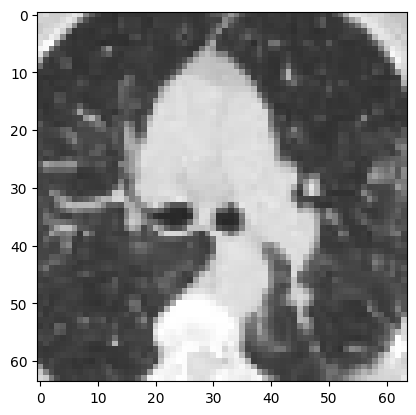

In [ ]:
plt.imshow(X[900])

In [ ]:
ch=2
print(np.max(img_resize[:,:,ch]))
print(np.max(img_resize_normalise[:,:,ch]))
print(np.min(img_resize[:,:,ch]))
print(np.min(img_resize_normalise[:,:,ch]))

255
1.0
53
0.20784313725490197


In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 7657645)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((13893, 64, 64, 3), (3474, 64, 64, 3), (13893,), (3474,))

In [ ]:
np.unique(Y_test, return_counts = True)

(array([0, 1]), array([1774, 1700]))

In [ ]:
np.unique(Y_train, return_counts = True)

(array([0, 1]), array([6990, 6903]))

In [ ]:
np.unique(X_test, return_counts =True)

(array([0.00000000e+00, 2.29779412e-05, 6.89338235e-05, ...,
        9.99992341e-01, 9.99996170e-01, 1.00000000e+00]),
 array([3400983,       3,       6, ...,     132,      75,  747090]))

In [ ]:
np.unique(X_train, return_counts = True)

(array([0.00000000e+00, 1.22549020e-04, 1.37867647e-04, ...,
        9.99992341e-01, 9.99996170e-01, 1.00000000e+00]),
 array([13368819,        3,        3, ...,      705,      339,  3411093]))

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, shuffle = True, random_state = 9809809)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((12503, 64, 64, 3), (1390, 64, 64, 3), (12503,), (1390,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# Define the input shape
input_shape = (64, 64, 3)

# Define input layer
inputs = Input(shape=input_shape)

# Define the first convolutional block
conv1_1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv1_1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)

# Define the second convolutional block
conv2_1 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
conv2_2 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(conv2_1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)

# Define the third convolutional block
conv3_1 = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
conv3_2 = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(conv3_1)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3_2)

# Multiscale Attention Mechanism
# Apply global average pooling to each feature map
gap1 = tf.keras.layers.GlobalAveragePooling2D()(conv1_2)
gap2 = tf.keras.layers.GlobalAveragePooling2D()(conv2_2)
gap3 = tf.keras.layers.GlobalAveragePooling2D()(conv3_2)

# Concatenate global average pooled feature maps
concatenated_gaps = Concatenate()([gap1, gap2, gap3])

# Dense layer to learn the attention weights
dense_attention = Dense(64, activation='relu')(concatenated_gaps)
attention_weights = Dense(3, activation='softmax')(dense_attention)  # Output softmax weights

# Apply attention to the feature maps
attention_conv1 = tf.keras.layers.Multiply()([conv1_2, attention_weights[:, 0][:, None, None, None]])
attention_conv2 = tf.keras.layers.Multiply()([conv2_2, attention_weights[:, 1][:, None, None, None]])
attention_conv3 = conv3_2  # No attention applied to the third convolutional block

# Resize feature maps to a consistent spatial resolution
resize_conv1 = Lambda(lambda x: tf.image.resize(x, (16, 16)))(attention_conv1)
resize_conv2 = Lambda(lambda x: tf.image.resize(x, (16, 16)))(attention_conv2)

# Concatenate attention-weighted feature maps
concatenated_attentions = Concatenate()([resize_conv1, resize_conv2, attention_conv3])

# Flatten the output for the dense layers
flattened = Flatten()(concatenated_attentions)

# Dense layers for classification
dense1 = Dense(256, activation='relu')(flattened)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)
output = Dense(1, activation='sigmoid')(dropout2)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks (e.g., ModelCheckpoint)
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)

# Train the model
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val, Y_val),
                    callbacks=[checkpoint])

# Load the best model
best_model = tf.keras.models.load_model("best_model.h5")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 32)           9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - 20s 27ms/step - loss: 0.6542 - accuracy: 0.5895 - val_loss: 0.5769 - val_accuracy: 0.6791
Epoch 2/20
391/391 [==============================] - 9s 23ms/step - loss: 0.4886 - accuracy: 0.7674 - val_loss: 0.3833 - val_accuracy: 0.8532
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3896 - accuracy: 0.8345 - val_loss: 0.3831 - val_accuracy: 0.8468
Epoch 4/20
391/391 [==============================] - 8s 21ms/step - loss: 0.3310 - accuracy: 0.8641 - val_loss: 0.3856 - val_accuracy: 0.8259
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.2893 - accuracy: 0.8792 - val_loss: 0.3634 - val_accuracy: 0.8417
Epoch 6/20
391/391 [==============================] - 9s 23ms/step - loss: 0.2544 - accuracy: 0.8955 - val_loss: 0.2756 - val_accuracy: 0.8806
Epoch 7/20
391/391 [==============================] - 9s 24ms/step - loss: 0.2168 - accuracy: 0.9105 - val_loss: 0.2315 - val_accuracy: 0.9115
Epoch 8/2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Model

# Define the input shapes
input_shape1 = (None, 64, 64)  # Shape of LSTM1 output
input_shape2 = (None, 128)     # Shape of LSTM2 output

# Define input layers
inputs1 = Input(shape=input_shape1)
inputs2 = Input(shape=input_shape2)

# Reshape inputs1 to match the shape of inputs2 along the concatenation axis
reshaped_inputs1 = tf.keras.layers.Flatten()(inputs1)

# Apply LSTM layer with more units and dropout
lstm1 = LSTM(128, return_sequences=True)(reshaped_inputs1)
lstm1 = Dropout(0.5)(lstm1)  # Increase dropout rate

# Apply global average pooling to lstm1 and inputs2
gap1 = GlobalAveragePooling1D()(lstm1)
gap2 = GlobalAveragePooling1D()(inputs2)

# Concatenate global average pooled representations
concatenated_gaps = Concatenate()([gap1, gap2])

# Add a dense layer with ReLU activation
dense1 = Dense(128, activation='relu')(concatenated_gaps)

# Add output layer with sigmoid activation
outputs = Dense(1, activation='sigmoid')(dense1)

# Define the model
best_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# Print the model summary
best_model.summary()

# Compile the model with a lower learning rate
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Generate placeholder data
num_samples = 1000
num_timesteps = 10
num_features1 = 64
num_features2 = 128

X_train1 = np.random.rand(num_samples, num_timesteps, num_features1)
X_train2 = np.random.rand(num_samples, num_features2)  # Remove num_timesteps dimension
Y_train = np.random.randint(2, size=(num_samples,))

X_val1 = np.random.rand(num_samples // 4, num_timesteps, num_features1)
X_val2 = np.random.rand(num_samples // 4, num_features2)  # Remove num_timesteps dimension
Y_val = np.random.randint(2, size=(num_samples // 4,))

# Train the model for more epochs
history = best_model.fit([X_train1, X_train2], Y_train, validation_data=([X_val1, X_val2], Y_val), epochs=50, batch_size=32)

ValueError: Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)

In [ ]:
print(X)

[[[[0.80392157 0.80392157 0.80392157]
   [0.81960784 0.81960784 0.81960784]
   [0.81568627 0.81568627 0.81568627]
   ...
   [0.82352941 0.82352941 0.82352941]
   [0.80784314 0.80784314 0.80784314]
   [0.81568627 0.81568627 0.81568627]]

  [[0.81176471 0.81176471 0.81176471]
   [0.81176471 0.81176471 0.81176471]
   [0.81176471 0.81176471 0.81176471]
   ...
   [0.80784314 0.80784314 0.80784314]
   [0.8        0.8        0.8       ]
   [0.80392157 0.80392157 0.80392157]]

  [[0.81176471 0.81176471 0.81176471]
   [0.81176471 0.81176471 0.81176471]
   [0.81176471 0.81176471 0.81176471]
   ...
   [0.81568627 0.81568627 0.81568627]
   [0.81176471 0.81176471 0.81176471]
   [0.82352941 0.82352941 0.82352941]]

  ...

  [[0.98039216 0.98039216 0.98039216]
   [0.91372549 0.91372549 0.91372549]
   [0.91372549 0.91372549 0.91372549]
   ...
   [0.94901961 0.94901961 0.94901961]
   [0.97647059 0.97647059 0.97647059]
   [1.         1.         1.        ]]

  [[0.99607843 0.99607843 0.99607843]
   [0.9

In [ ]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 32)           9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

<Axes: >

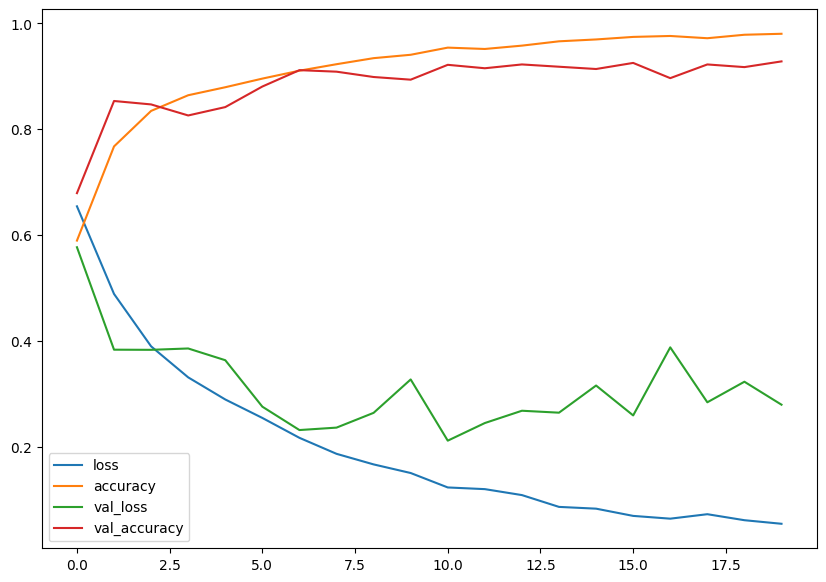

In [ ]:
pd.DataFrame(history.history).plot(figsize =(10,7))

In [ ]:
best_model.evaluate(X_test, Y_test)

109/109 [==============================] - 1s 7ms/step - loss: 0.2961 - accuracy: 0.9145


[0.29608291387557983, 0.9145077466964722]

109/109 [==============================] - 1s 7ms/step


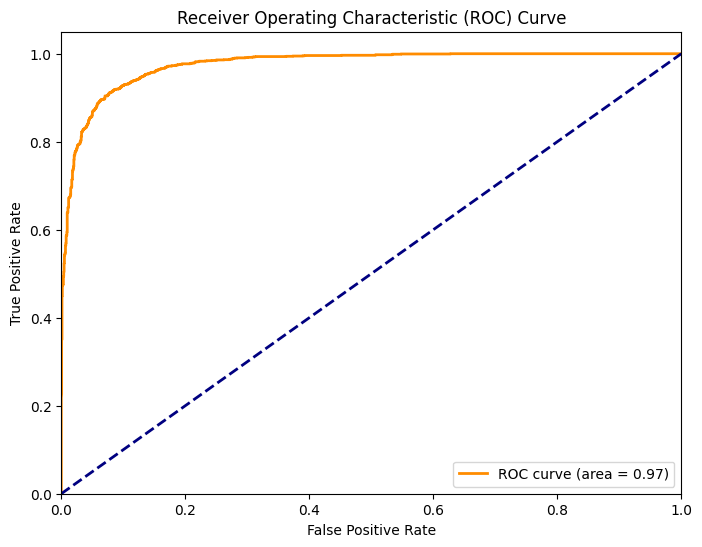

In [ ]:
from sklearn.metrics import roc_curve, auc
y_probs = best_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_probs = best_model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

109/109 [==============================] - 2s 14ms/step
Confusion Matrix:
[[1614  160]
 [ 137 1563]]


In [ ]:
tp = conf_matrix[0, 0]
tn = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1_score)
print("Specificity:", specificity)
print("Matthews correlation coefficient:", mcc)

Precision: 0.9098083427282976
Recall (Sensitivity): 0.92175899486008
F1-score: 0.9157446808510639
Specificity: 0.9071387115496228
Matthews correlation coefficient: 0.8290588912501928
